### Basic setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['hatch.linewidth'] = 4

In [2]:
furn_dict = {
    'Cabinet' : 11,
    'Chair' : 17,
    'Drawer' : 8,
    'Desk' : 16,
    'Square_table' : 16,
    'Stool' : 11,
    'Round_table': 8,
    'Lamp' : 7,
    'One_leg': 5,
}

phase_dict = {
    'Cabinet' : [4, 6, 11],
    'Chair' : [5, 8, 11, 14, 17],
    'Drawer' : [5, 8],
    'Desk' : [5, 8, 13, 16],
    'Square_table' : [5, 8, 13, 16],
    'Stool' : [5, 8, 11],
    'Round_table': [5, 8],
    'Lamp' : [5, 7],
    'One_leg': [5],
}

markers = ['o', '^', '.', '*', 'X']
line_styles = ['--', 'solid', 'dotted', 'dashdot']
patterns = ['', '\\', '', '\\']
x = [100, 250, 500, 750, 1000]

sns.set_style('whitegrid')

colors = ['#5EA3EF', '#EF8636', '#B671DE', '#458933', '#FF5968', '#FBE5A3']
# phase_colors = ['#E3E3E3', '#BABDC1', '#A2A6AC', '#8C939A', '#5D6874']
phase_colors = ['#E3E3E3', '#BABDC1', '#E3E3E3', '#BABDC1', '#E3E3E3']
# phase_colors = ['#C5E8B7', '#ABE098', '#83D475', '#57C84D', '#2EB62C']
custom_palette = sns.color_palette(colors)
sns.color_palette(colors)

[(0.3686274509803922, 0.6392156862745098, 0.9372549019607843),
 (0.9372549019607843, 0.5254901960784314, 0.21176470588235294),
 (0.7137254901960784, 0.44313725490196076, 0.8705882352941177),
 (0.27058823529411763, 0.5372549019607843, 0.2),
 (1.0, 0.34901960784313724, 0.40784313725490196),
 (0.984313725490196, 0.8980392156862745, 0.6392156862745098)]

### Full-assembly plot

In [3]:
for furniture in furn_dict.keys():
    FURNITURE = furniture
    SUBTASKS = furn_dict[FURNITURE]
    phases = phase_dict[FURNITURE]


    df = pd.read_csv(f'./data/{FURNITURE}.csv')
    df.dropna(axis=0, inplace=True)
    print(FURNITURE)
    sns.set_theme(style='whitegrid')
    sns.set_palette(custom_palette)

    fig, ax = plt.subplots(figsize=(5,5))
    
    for i, phase in enumerate(phases):
        if i == 0:
            ax.axhspan(0, phase, facecolor=phase_colors[i], alpha=0.9)
        else:
            ax.axhspan(phases[i-1], phase, facecolor=phase_colors[i], alpha=0.9)

    bar = sns.barplot(x='Randomness', y='Score', data=df, hue='Algorithm', errorbar=('pi', 100), capsize=.2, errwidth=4)

    # for i,thisbar in enumerate(bar.patches):
    #     thisbar.set_hatch(patterns[i])

    plt.title(f'{FURNITURE}', fontsize=30, pad=10)
    plt.xlabel('Randomness', fontsize=24)
    plt.ylabel('Completed phases', fontsize=24)

    plt.ylim(top=SUBTASKS)
    plt.xticks([0, 1, 2], ['Low', 'Medium', 'High'], fontsize=24)
    if FURNITURE in ['One_leg', 'Round_table', 'Drawer', 'Lamp']:
        plt.yticks([i for i in range(0, SUBTASKS+1, 2)] + [SUBTASKS], fontsize=24)
    else:
        plt.yticks([i for i in range(0, SUBTASKS+1, 4)] + [SUBTASKS], fontsize=24)

    
    # plt.legend(loc='center left', bbox_to_anchor=(0.3,-0.2))
    bar.get_legend().remove()
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'./plots/full/{FURNITURE}.pdf')   

FileNotFoundError: [Errno 2] No such file or directory: './data/Cabinet.csv'

### Data scalability plot

#### Real-world results

In [4]:
df = pd.read_csv('./data/line.csv')
# plt.figure(figsize=(20,15))
for i in range(len(df)):
    data = df.iloc[i].drop('Algorithm').to_numpy()

    if i <= 1:
        marker = markers[0]
        color = colors[1]
    else:
        color = colors[0]
        marker = markers[1]

    plt.plot(x, data, marker=marker, markersize=7, linestyle=line_styles[i%2], color=color, label=df['Algorithm'][i], linewidth=2.5)
    # plt.plot(x, data, marker=marker, markersize=12, linestyle=line_styles[i%2], color=color, label=df['Algorithm'][i], linewidth=4)

plt.xlabel('# Demos', fontsize=24)
plt.ylabel('Completed phases', fontsize=24)
# plt.legend(loc=(0,-0.3), ncols=4, handlelength=2.5, fontsize=24)
# plt.legend(prop={'size': 12})

# leg.legendHandles[0]._legmarker.set_markersize(15)
# legend.legendHandles[0]._legmarker.set_alpha(1)
# plt.ylim(top=5.0)
plt.xticks([100, 250, 500, 750, 1000], ['100', '250', '500', '750', '1000'], fontsize=24)
plt.yticks([1, 2, 3, 4, 5], [1,2,3,4,5], fontsize=24)
plt.tight_layout()
plt.savefig('./plots/correlation_simulation.pdf')

FileNotFoundError: [Errno 2] No such file or directory: './data/line.csv'

In [5]:
df = pd.read_csv('./data/line_success.csv')

for i in range(len(df)):
    data = df.iloc[i].drop('Algorithm').to_numpy()

    if i <= 1:
        marker = markers[0]
        color = colors[1]
    else:
        color = colors[0]
        marker = markers[1]

    plt.plot(x, data, marker=marker, markersize=12, linestyle=line_styles[i%2], color=color, label=df['Algorithm'][i], linewidth=3.5)
    # plt.plot(x, data, marker=marker, markersize=12, linestyle=line_styles[i%2], color=color, label=df['Algorithm'][i], linewidth=4)

plt.xlabel('# Demos', fontsize=24)
plt.ylabel('Success rate', fontsize=24)

# plt.legend(prop={'size': 16}, ncol=4)

plt.ylim(top=0.5)
plt.xticks([100, 250, 500, 750, 1000], ['100', '250', '500', '750', '1000'], fontsize=24)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], [0, 0.1, 0.2, 0.3, 0.4, 0.5], fontsize=24)
plt.tight_layout()
plt.savefig('./plots/correlation_simulation_success_rate.pdf')

FileNotFoundError: [Errno 2] No such file or directory: './data/line_success.csv'

#### Simulated results

In [6]:
# df = pd.read_csv('./data/line_full_success.csv')
df = pd.read_csv('./data/line_full.csv')

# plt.figure(figsize=(8,8))
for i in range(len(df)):
    data = df.iloc[i].drop('Algorithm').to_numpy()
    if i < 3:
        marker = 'o'
    else:
        marker = '^'
    # if i == 2:
    #     plt.plot(x, data, marker=marker, markersize=10, color= colors[i], linestyle='dashed', label=df['Algorithm'][i], linewidth=3.5)
        # continue
    plt.plot(x, data, marker=marker, markersize=10, color= colors[i], label=df['Algorithm'][i], linewidth=3.5)

plt.xlabel('# Demos', fontsize=24)
plt.ylabel('Completed phases', fontsize=24)
# plt.legend(loc=(-0.2,-0.4), ncols=5, columnspacing=1)
# plt.legend(prop={'size': 12})

plt.ylim(top=5.0)
plt.xticks([100, 250, 500, 750, 1000], ['100', '250', '500', '750', '1000'], fontsize=24)
plt.yticks([0, 1, 2, 3, 4, 5], [0,1,2,3,4,5], fontsize=24)
plt.tight_layout()
plt.savefig('./plots/simulation_performance.pdf')

FileNotFoundError: [Errno 2] No such file or directory: './data/line_full.csv'

### Reproducibility experiments

TypeError: bar() got multiple values for argument 'width'

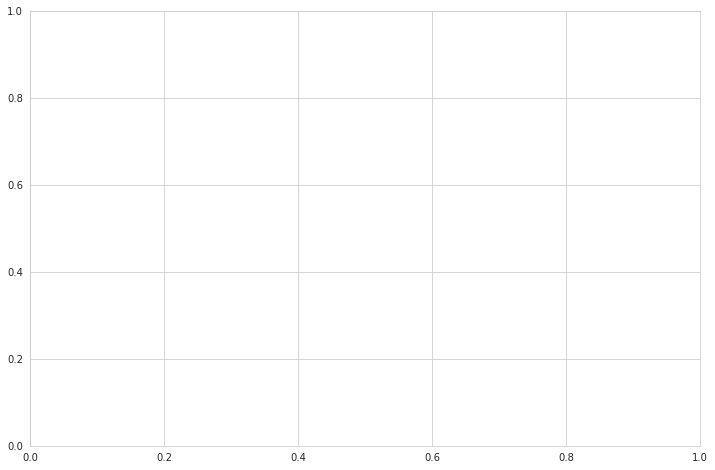

In [8]:
df = pd.read_csv('./reproducibility.csv')

plt.figure(figsize=(12,8))

# bar = sns.barplot(x='Setup', y='Score', data=df, errorbar=('pi', 100), capsize=.2, errwidth=2)
sns.barplot(x='Setup', y='Score', data=df, errorbar=('pi', 100), capsize=.2, errwidth=4, width=0.6)
plt.ylabel('Completed phases', fontsize=28)
plt.xlabel('')
plt.xticks([0, 1, 2, 3, 4, 5], ['Original', 'Reproduced 1', 'Reproduced 2', 'Reproduced 3', 'Reproduced 4', 'Reproduced 5'], fontsize=17)
plt.yticks([0,1,2,3,4,5], [0,1,2,3,4,5], fontsize=26)
plt.tight_layout()
# plt.show()
plt.savefig('./plots/reproducibility.pdf')

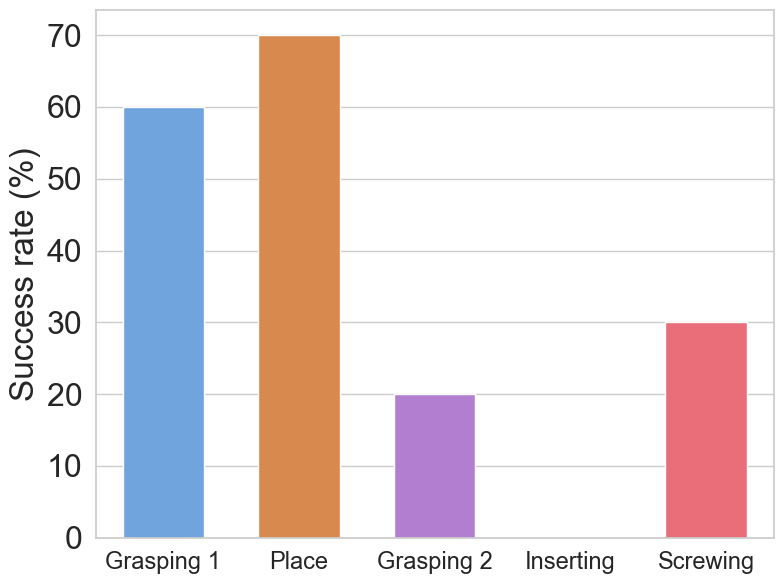

In [10]:
x = ['Grasping1', 'Place', 'Grasping2', 'Inserting', 'Screwing']
y = [60, 70, 20, 0, 30]

plt.figure(figsize=(8,6))

# bar = sns.barplot(x='Setup', y='Score', data=df, errorbar=('pi', 100), capsize=.2, errwidth=2)
# sns.barplot(x='Setup', y='Score', data=df, errorbar=('pi', 100), capsize=.2, errwidth=4, width=0.6)
sns.barplot(x=x, y=y, width=0.6)
plt.ylabel('Success rate (%)', fontsize=24)
plt.xlabel('')
plt.xticks([0, 1, 2, 3, 4], ['Grasping 1', 'Place', 'Grasping 2', 'Inserting', 'Screwing'], fontsize=17)
plt.yticks([i for i in range(0, 71, 10)], [i for i in range(0, 71, 10)], fontsize=23)
plt.tight_layout()
# plt.show()
plt.savefig('./plots/reproducibility.pdf')